In [2]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys

#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))

## engine
#/opt/lumerical/v221/bin

In [3]:
fdtd = lumapi.FDTD(filename= 'MMI.fsp')

## parameters

In [100]:
W1 = 1.48e-6
W2 = 1.48e-6
W3 = 1.6e-6
W4 = 0.5e-6
W5 = 0.7e-6
W6 = 0.2e-6
L1 = 1e-6
L2 = 2.4e-6
L3 = 1.6e-6
height = 0.22e-6
c = 299792458
length = 2*(L1 + L2 + L3)
band_0 = 1.53e-6
band_1 = 1.565e-6
material_core = 'Si (Silicon) - Palik'
material_subs = 'SiO2 (Glass) - Palik'

In [105]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addobject('linear_taper')
fdtd.set('name','taper1')
fdtd.set({'x':0,
'y':W6/2 + W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W4,
'width_r':W5,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper2',
'x':0,
'y':-(W6/2 + W5/2),
'z':0,
'thickness':height,
'angle_side':90,
'width_r':W5,
'width_l':W4,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper3',
'x':L1/2 + L2/2,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':2*W5 + W6,
'width_r':W1,
'len':L2,
'material':material_core})

fdtd.addrect()
fdtd.set({
'name':'rect_mmi',
'x min':L1/2 + L2,
'x max':L1/2 + L2 + 2*L3,
'y':0,
'y span':W2,
'z':0,
'z span':height,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper4',
'x':L1/2 + L2 + 2*L3 + L2/2,
'y':0,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W1,
'width_r':W3,
'len':L2,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper5',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2,
'y':W6/2 + W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W5,
'width_r':W4,
'len':L1,
'material':material_core})

fdtd.addobject('linear_taper')
fdtd.set({'name':'taper6',
'x':L1/2 + L2 + 2*L3 + L2 + L1/2,
'y':-W6/2 - W5/2,
'z':0,
'thickness':height,
'angle_side':90,
'width_l':W5,
'width_r':W4,
'len':L1,
'material':material_core})

In [119]:
xspan_bend = 5e-6
yspan_bend = 2e-6

fdtd.addobject('s_bend_wg')
fdtd.set({
'name':'bend_down_in',
'x':-L1/2 - xspan_bend,
'y':-2e-6 - W6/2 - W5/2,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height
})

fdtd.addobject('s_bend_wg')
fdtd.set({
'first axis':'y',
'rotation 1':180})

fdtd.set({'name':'bend_up_in',
'x':-L1/2,
'y':W6/2 + W5/2,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height})

fdtd.addobject('s_bend_wg')
fdtd.set({
'name':'bend_up_out',
'x':L1/2 + L2 + 2*L3 + L2 + L1,
'y':W6/2 + W5/2,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height
})

fdtd.addobject('s_bend_wg')
fdtd.set({
'first axis':'y',
'rotation 1':180})

fdtd.set({'name':'bend_down_out',
'x':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend,
'y':-W6/2 - W5/2 - yspan_bend,
'z':0,
'base angle':90,
'base width':0.5e-6,
'x span':xspan_bend,
'y span':yspan_bend,
'base height':height})


In [125]:
fdtd.addrect()
fdtd.set({
'name':'rect_up_in',
'x':-L1/2 - xspan_bend - 0.5e-6,
'x span':1e-6,
'y':W6/2 + W5/2 + yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})

fdtd.addrect()
fdtd.set({
'name':'rect_down_in',
'x':-L1/2 - xspan_bend - 0.5e-6,
'x span':1e-6,
'y':-W6/2 - W5/2 - yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})

fdtd.addrect()
fdtd.set({
'name':'rect_down_out',
'x':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend + 0.5e-6,
'x span':1e-6,
'y':-W6/2 - W5/2 - yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})

fdtd.addrect()
fdtd.set({
'name':'rect_down_out',
'x':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend + 0.5e-6,
'x span':1e-6,
'y':W6/2 + W5/2 + yspan_bend,
'y span':0.5e-6,
'z':0,
'z span':height,
'material':material_core
})



In [132]:
fdtd.switchtolayout()
fdtd.select('FDTD')
fdtd.delete()
fdtd.select('monitor')
fdtd.delete()
fdtd.select('mesh')
fdtd.delete()
simulation_time = 1000e-15
dx = 0.01e-6
mesh = 8
fdtd.addfdtd()
nof = 500 ## number of frequency points
fdtd.set({'x min':-L1/2 - xspan_bend - 0.5e-6 - 0.25e-6,
'x max':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend + 0.5e-6 + 0.25e-6,
'y':0,
'y span':9.5e-6,
'z':0,
'z span':4e-6,
'simulation time':simulation_time,
'mesh accuracy':mesh,
'background material':material_subs})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Forward',
'x':-L1/2 - xspan_bend - 0.5e-6,
'y':W6/2 + W5/2 + yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Forward',
'x':-L1/2 - xspan_bend - 0.5e-6,
'y':-W6/2 - W5/2 - yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Backward',
'x':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend + 0.5e-6,
'y':W6/2 + W5/2 + yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6})

fdtd.addport()
fdtd.set({'injection axis':'x-axis',
'direction':'Backward',
'x':L1/2 + L2 + 2*L3 + L2 + L1 + xspan_bend + 0.5e-6,
'y':-W6/2 - W5/2 - yspan_bend,
'y span':4e-6,
'z':0,
'z span':4e-6})

fdtd.select('FDTD::ports')
fdtd.set('monitor frequency points', nof)
#fdtd.set('wavelength start',1.53e-6)
#fdtd.set('wavelengh stop',1.565e-6)

fdtd.addprofile()
fdtd.set({'x min':-L1,
'x max':L1/2 + L2 + 2*L3 + L2 + L1/2 + L1,
'y':0,
'y span':4e-6,
'z':0,
'override global monitor settings':1,
'frequency points':nof})

#fdtd.run()

In [8]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [133]:
eField = np.squeeze(fdtd.getelectric("monitor"))

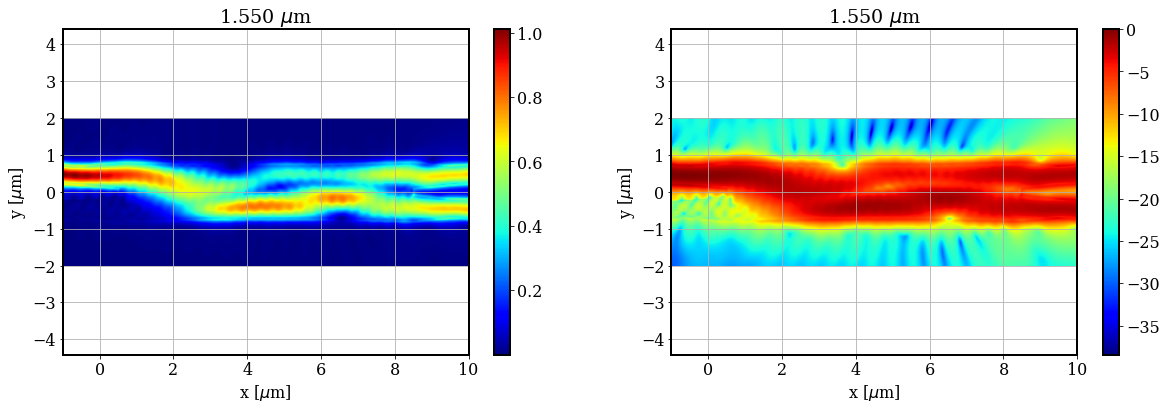

In [134]:
indxLambda = 213
x_efielf = fdtd.getdata("monitor", "x")
y_efielf = fdtd.getdata("monitor", "y")
lmbd = nu2lambda(fdtd.getdata("monitor", "f"))
xmin = 1e6*np.min(x_efielf);
xmax = 1e6*np.max(x_efielf);
ymin = 1e6*np.min(y_efielf);
ymax = 1e6*np.max(y_efielf);

fig1, axs1 = plt.subplots(1,2,figsize=(20,6))
im1 = axs1[0].imshow(np.rot90(np.sqrt(eField[:,:,indxLambda])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im1, ax=axs1[0])
axs1[0].set_xlabel(r'x [$\mu$m]')
axs1[0].set_ylabel(r'y [$\mu$m]')
axs1[0].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[0].grid(True)
axs1[0].axis('equal')

im2 = axs1[1].imshow(10*np.log10(np.rot90(np.sqrt(eField[:,:,indxLambda]))), cmap = 'jet', extent=[xmin, xmax, ymin, ymax])
fig1.colorbar(im2, ax=axs1[1])
axs1[1].set_xlabel(r'x [$\mu$m]')
axs1[1].set_ylabel(r'y [$\mu$m]')
axs1[1].set_title(r'%4.3f $\mu$m'%(1e6*lmbd[indxLambda]))
axs1[1].grid(True)
axs1[1].axis('equal')

fig1.tight_layout
plt.rcParams.update({'font.size': 16})

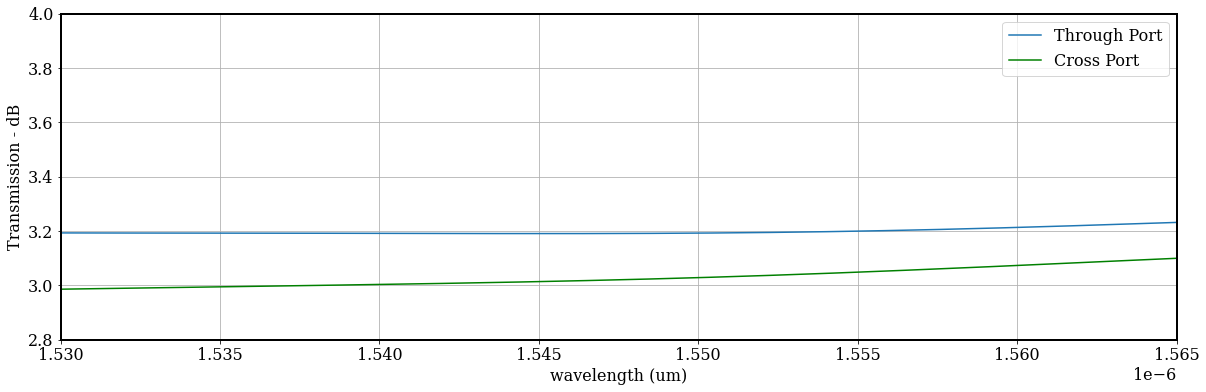

In [143]:
R1 = fdtd.getresult('FDTD::ports::port 1', 'T')
R2 = fdtd.getresult('FDTD::ports::port 2', 'T')
R3 = fdtd.getresult('FDTD::ports::port 3', 'T') ##port3 result
R4 = fdtd.getresult('FDTD::ports::port 4', 'T')

T1 = 10*np.log10(R1['T'])
T2 = 10*np.log10(R1['T'])
T3 = 10*np.log10(R3['T'])
T4 = 10*np.log10(R4['T'])
wavelength = R3['lambda']

figure = plt.figure(figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength,-T3, label = 'Through Port' )
plt.plot(wavelength,-T4, label = 'Cross Port',color = 'green')
plt.xlabel('wavelength (um)')
plt.ylabel('Transmission - dB')
plt.ylim([2.8, 4])
plt.xlim([1.53e-6,1.565e-6])
plt.grid(True)
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'insertion loss - dB')

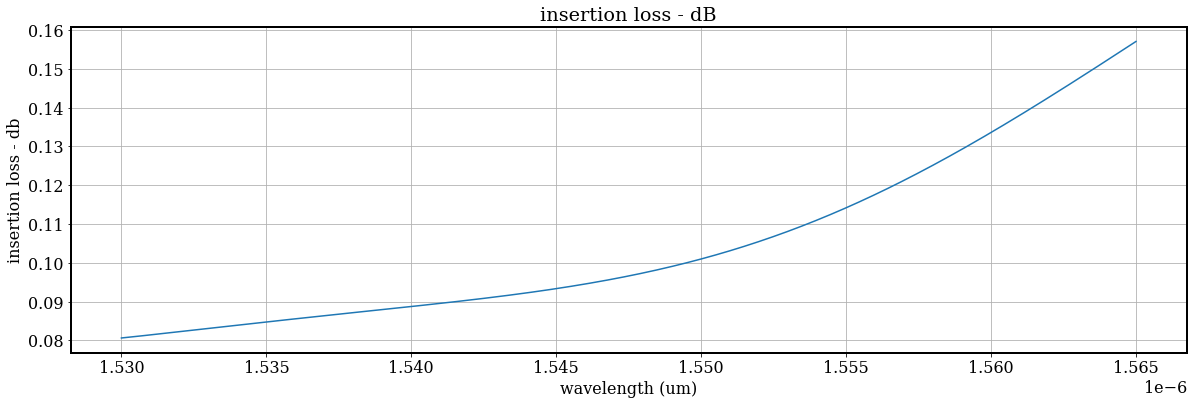

In [138]:
insertion_loss =10*np.log10(R1['T'])-(10*np.log10(R2['T'] + R3['T'] + R4['T']))

figure = plt.figure(figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(wavelength, insertion_loss)
plt.grid(True)
plt.xlabel('wavelength (um)')
plt.ylabel('insertion loss - db')
plt.title('insertion loss - dB')

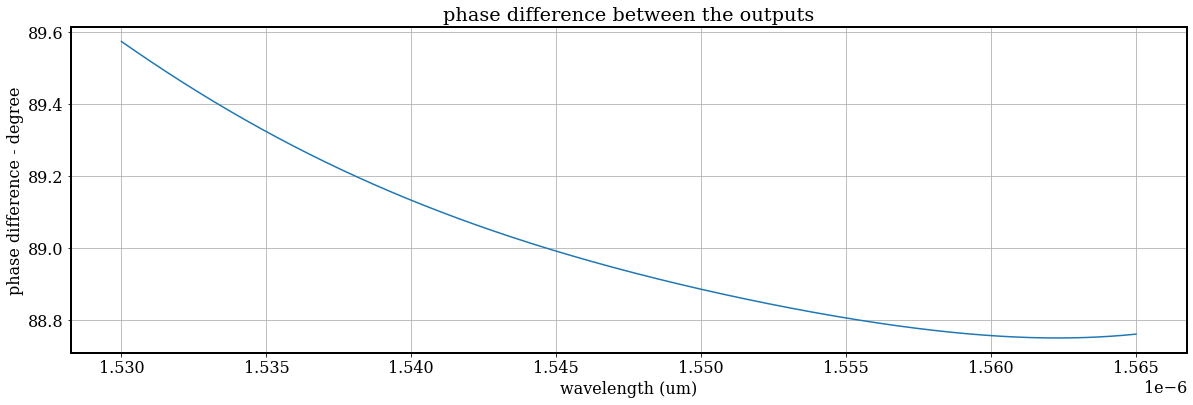

In [140]:
port3S = fdtd.getresult('FDTD::ports::port 3','S')
port4S = fdtd.getresult('FDTD::ports::port 4','S')
phase_3 = fdtd.angle(port3S['S'])
phase_4 = fdtd.angle(port4S['S'])
angle_3 = fdtd.unwrap(phase_3)*180/(np.pi)
angle_4 = fdtd.unwrap(phase_4)*180/(np.pi)
lambd = port3S['lambda']

figure = plt.figure(figsize = (20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(lambd, (angle_3 - angle_4))
plt.xlabel('wavelength (um)')
plt.ylabel('phase difference - degree')
plt.title('phase difference between the outputs')
plt.grid(True)